<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

# **SC13x** 

# **Linear Algebra**

## **Part 1. Linear Algebra**

### **1-1. 벡터의 내적**

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

</br>

- $\vec{c} \cdot \vec{d}$ 를 구해보세요. 
- 이 두 개의 vector가 orthogonal 관계 (직교)에 있는지 확인해보세요.

##### **Q1. 두 벡터 c, d가 orthogonal 관계(직교)에 있다면 왜 그런지, 아니라면 왜 아닌지 쓰세요.**

In [1]:
import numpy as np

In [3]:
c = np.array([3,7,-2,12])
d = np.array([9,-7,4,6])

In [4]:
np.dot(c,d)

42

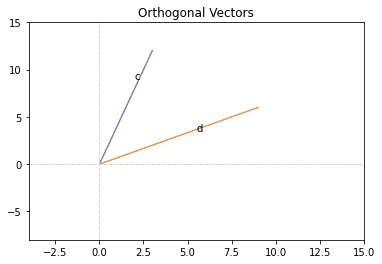

In [16]:
import matplotlib.pyplot as plt

plt.axhline(0, 0, 1, color='lightgray', linestyle='--', linewidth=1)
plt.axvline(0, 0, 1, color='lightgray', linestyle='--', linewidth=1)
plt.arrow(0, 0, c[0], c[3], head_width = .05, head_length = .05, color ='#947EC3')
plt.text(2, 9, 'c')
plt.arrow(0, 0, d[0], d[3], head_width = .05, head_length = .05, color ='#EC994B')
plt.text(5.5, 3.5, 'd')
plt.xlim(-4, 15)          
plt.ylim(-8, 15)
plt.title("Orthogonal Vectors")
plt.show()

In [ ]:
# c,d의 내적이 0이 아니므로 직교가 아니다.

### **1-2. 행렬의 연산**


\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

</br>

- $E^{-1}$, $E^T$을 구하세요.





In [17]:
E = np.array([[7,4,2],[1,3,-1],[2,6,-4]])

##### **Q2. $E^{-1}$의 첫번째 row의 합을 반올림하여 소수점 둘째 자리까지 구한 값과 $E^T$의 첫번째 row의 합을 튜플 형태로 쓰세요. ex) (0.12, 22)** 

In [22]:
np.linalg.inv(E)[0].sum().round(2)

-0.35

In [23]:
E.T[0].sum()

10

### **1-3. Determinant**

행렬 $F$ 를 활용하여 다음 `Q3` 질문에 답해봅니다.

</br>

\begin{align}
F = 
\begin{bmatrix}
    2 & -2 & 5 \\
    4 & 1 & 10 \\
    12 & 6 & 30
\end{bmatrix}
\end{align}



 



In [24]:
F = np.array([[2,-2,5],[4,1,10],[12,6,30]])

##### **Q3. $det F$ 값을 바탕으로 행렬 $F$ 에는 어떤 의미가 있는지 쓰세요.**

In [25]:
np.linalg.det(F)

0.0

In [26]:
# 역행렬이 존재하지 않음

## **Part 2. PCA**

### **2-1. Covariance & Correlation**

- 다음 표를 보고 `S&P 500`과 `ABC Corp.`의 공분산과 상관계수를 구하세요.

  <img src='https://i.imgur.com/QBCt8yx.png' width=500>

In [34]:
stock= np.array([[2013,2014,2015,2016,2017],[1692,1978,1884,2151,2519],[68,102,110,112,154]])
data = {'S&P500':stock[1],
        'ABC_Corp': stock[2]}

import pandas as pd

df = pd.DataFrame(data)
df.set_index(stock[0], inplace=True)
df

,S&P500,ABC_Corp
2013,1692,68
2014,1978,102
2015,1884,110
2016,2151,112
2017,2519,154


##### **Q4. 공분산과 상관계수를 각각 반올림하여 소수점 둘째 자리까지 구하여 (공분산, 상관계수)의 형태로 쓰세요.** 

In [39]:
df.cov().round(2)

,S&P500,ABC_Corp
S&P500,97732.7,9107.3
ABC_Corp,9107.3,941.2


In [40]:
df.corr().round(2)

,S&P500,ABC_Corp
S&P500,1.00,0.95
ABC_Corp,0.95,1.00


### **2-2. PCA**




#### **2-2-a. 데이터 표준화** 

- `Country` column을 `country` 라는 변수에 저장하세요.
- 다음 [링크](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)를 참고하여 `df`의 numerical columns에 대해 표준화를 진행하세요.




##### **Q5. 표준화 한 후, `Sugars` column의 index가 0인 값을 반올림하여 소수점 둘째 자리까지 구하세요.**

In [41]:
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

df

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [43]:
country = df.Country

In [48]:
standardized_data = ( df - np.mean(df, axis = 0) ) / np.std(df, ddof=1, axis = 0);
standardized_data.Sugars[0].round(2)

0.11

#### **2-2-b. PCA**

표준화를 진행한 `df`에 PCA를 적용한 후 `scatterplot`을 그려봅니다.
- PCA 결과를 `pca_df`라는 이름의 데이터프레임으로 저장하세요.
  - PC의 개수는 2개 ~ 4개 사이로 지정하세요.
  - 각 column의 이름은 `PC1`, `PC2`...로 설정하세요.
- scatterplot의 x축에 `PC1`, y축에 `PC2`이 나타나도록 하세요.
- scatterplot의 hue 파라미터를 `country`로 지정하세요. 

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_numeric = df.drop('Country', axis=1)

scaler = StandardScaler()
sc_df = scaler.fit_transform(df_numeric)

pca = PCA() 
pca.fit(sc_df)
pca_df = pca.transform(sc_df)

In [58]:
pca_df = pd.DataFrame(pca_df, columns=['pc1','pc2','pc3','pc4'])
pca_df

,pc1,pc2,pc3,pc4
0,-0.954490,0.328318,1.829829,-4.891008e-17
1,-4.520951,-1.735380,-0.781412,-4.463072e-16
2,0.487978,3.233672,-0.765148,1.425331e-15
3,4.987462,-1.826611,-0.283270,-1.140965e-15


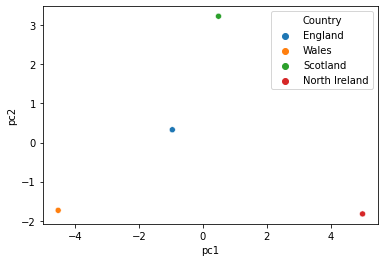

In [60]:
import seaborn as sns
sns.scatterplot(data=pca_df, x='pc1', y='pc2', hue=country);

##### **Q6. `scatterplot`의 가장 왼쪽에 위치하고 있는 나라는 어디인가요?**

In [61]:
# Wales

## **Part 3. Clustering**

### **3-1. K-Means Clustering**

아래 데이터에 대해 K-Means Clustering을 적용한 후, 그 결과를 seaborn 라이브러리의 `scatterplot`으로 시각화하세요.
- `n_clusters = 4`, `random_state = 42`를 제외한 다른 parameter는 default option을 사용합니다.
- `scatterplot`의 hue 파라미터를 설정하여, cluster 별로 데이터가 어디에 위치해 있는지 확인합니다.


##### **Q7. scatterplot에서 가장 우측 상단에 위치해 있는 cluster는 무엇인가요?**

In [62]:
points = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/sc13x/data.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [68]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42).fit(points)
kmeans_labels = kmeans.labels_
k4 = points.assign(Cluster = kmeans_labels)
k4

,x,y,Cluster
0,-7.846803,-3.421277,0
1,-3.554323,-6.884729,2
2,-0.192822,-9.671030,2
3,-6.401456,-5.223972,0
4,-0.804026,-9.704457,2
...,...,...,...
195,-3.560689,4.567320,3
196,5.051216,4.745086,1
197,6.127624,4.285188,1
198,-1.783078,-8.890394,2


In [77]:
k4.Cluster.value_counts()

2    101
0     33
3     33
1     33
Name: Cluster, dtype: int64

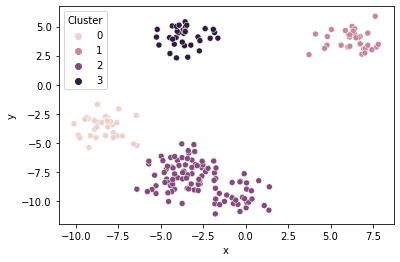

In [96]:
sns.scatterplot(data=k4, x='x', y='y', hue=k4.Cluster);

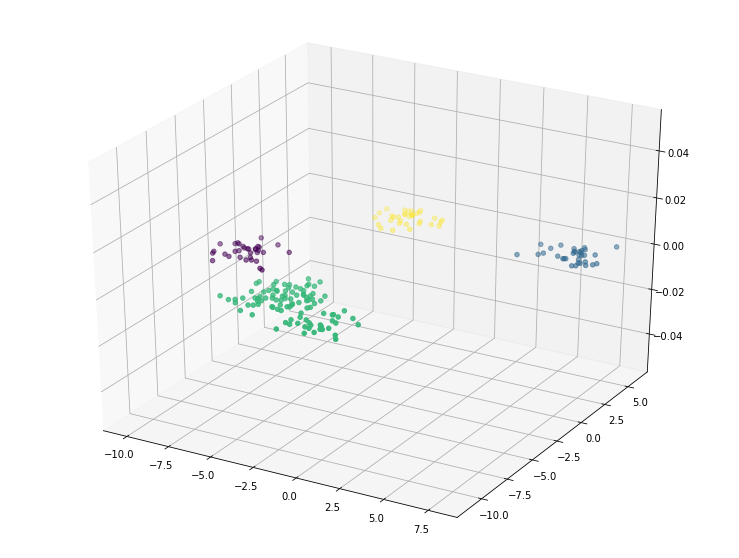

In [84]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (13,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = k4.x, ys = k4.y, c=k4.Cluster)

plt.show()

In [ ]:
# 1

## **Part 4. 도전 과제**

위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아래 **2개의 추가 조건들 중 하나**를 만족하는 경우 3점을 얻을 수 있습니다.

아래 요구사항들은 모두 **optional** 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)



### **4-1. Scree plot** 




#### **`2-2-b.`에서 진행한 PCA 결과에 대해서 `Scree plot`을 추가하세요.**

In [99]:
pca.explained_variance_ratio_

array([6.83278713e-01, 2.48712884e-01, 6.80084029e-02, 2.42750388e-33])

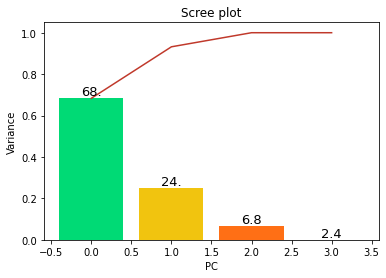

In [100]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
  
scree_plot(pca)

### **4-2. Elbow Methods**



#### **Elbow Methods를 활용하여 `Part 3. Clustering`에서 최적의 k값을 선택하는 과정을 논리적으로 설명하세요.**


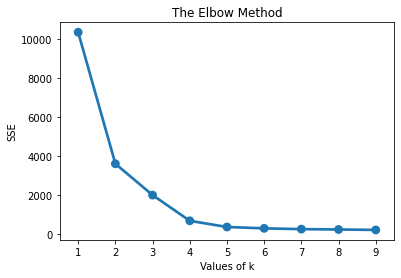

In [101]:
sse = {}

for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(points)
  sse[k] = kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()